# 1. Overview

This document aims to show with simple examples each of the key points in the [Progress Doc](https://docs.google.com/document/d/1XMNXktCoSabnFWZf9rJFoaKMzsA1bbv7x1Xh9tXkKYk/edit#heading=h.gq20wfhs4tmi).

---

# 2. Helper Code

---

In [1]:
#@title Imports
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from collections import Counter
from crypto import *
from util import *

# 3. Demonstrations

---

## 3.1. Plain Eye Messages

Image of the 9 eye messages stacked, with trigram values 0-82 labelled.  
Each row represents a message, with each cell representing a trigram.  

### Eye Data

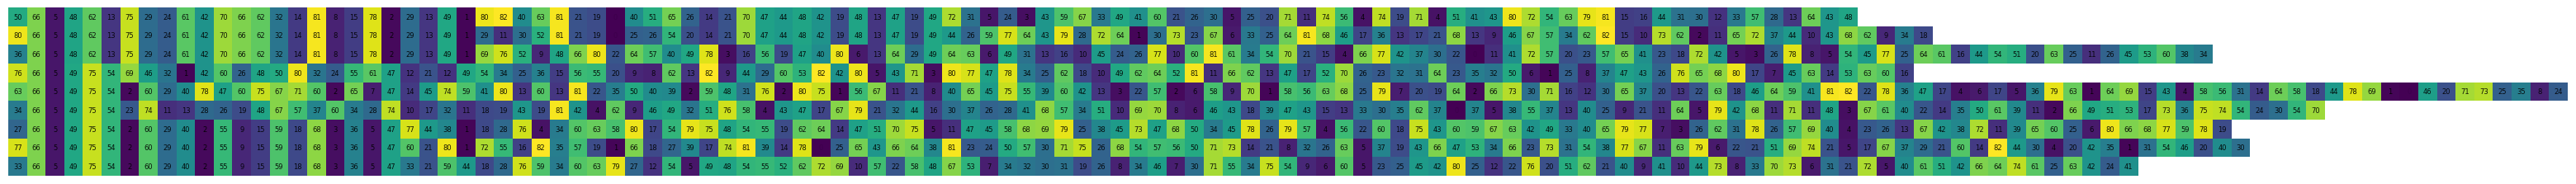

In [17]:
plot_msgs(eye_msgs_tri)

### Random Data

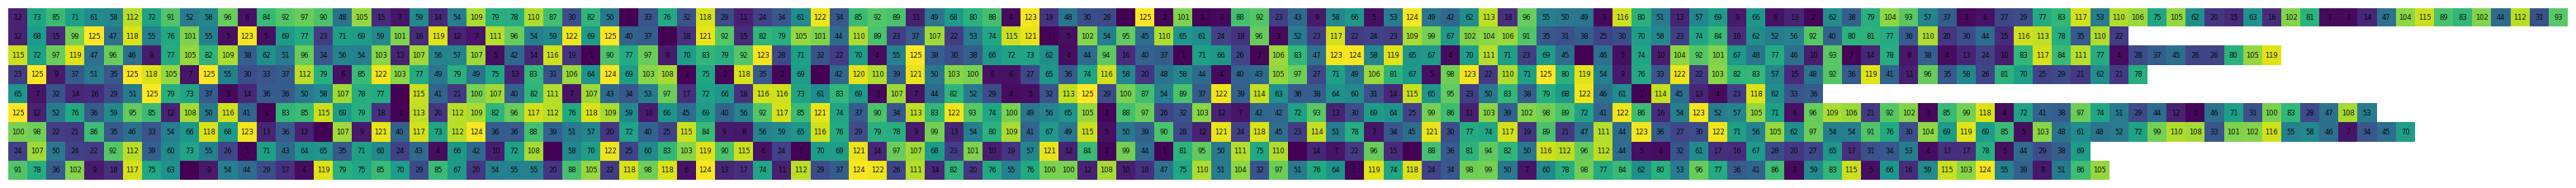

In [18]:
msgs_random, _ = generate_random_msgs_tri()
plot_msgs(msgs_random)

## 3.2. Shared Sections

Each message shown row by row.  
Matching trigrams labelled and shown.  
<br />
**Observation:** Large shared sections between eye_msgs_tri.  
**Observation:** The 1st letter differs in every message, but the 2nd is the same.  
**Key Takeaway:** Each message has to of been encoded by the same algorithm.  

### Eye Data

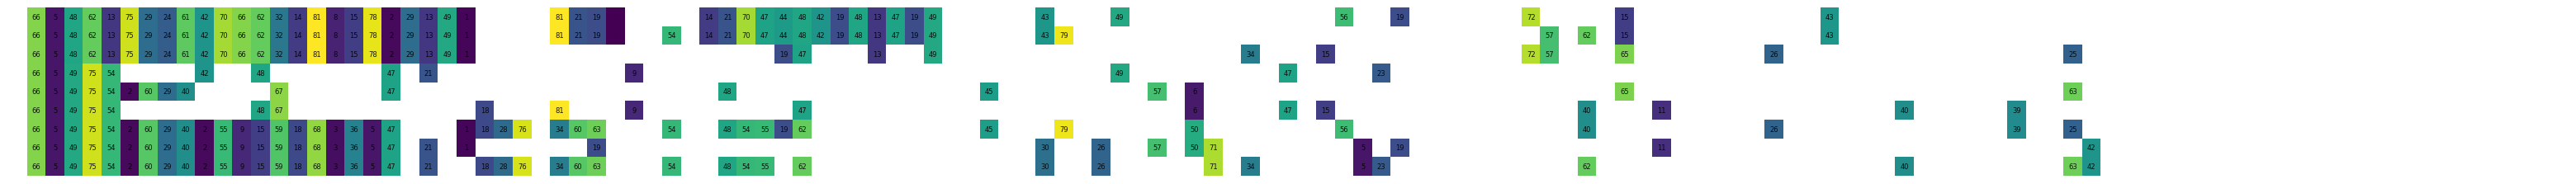

In [19]:
eyes_shared = calc_shared(eye_msgs_tri)
plot_im(eyes_shared, True)

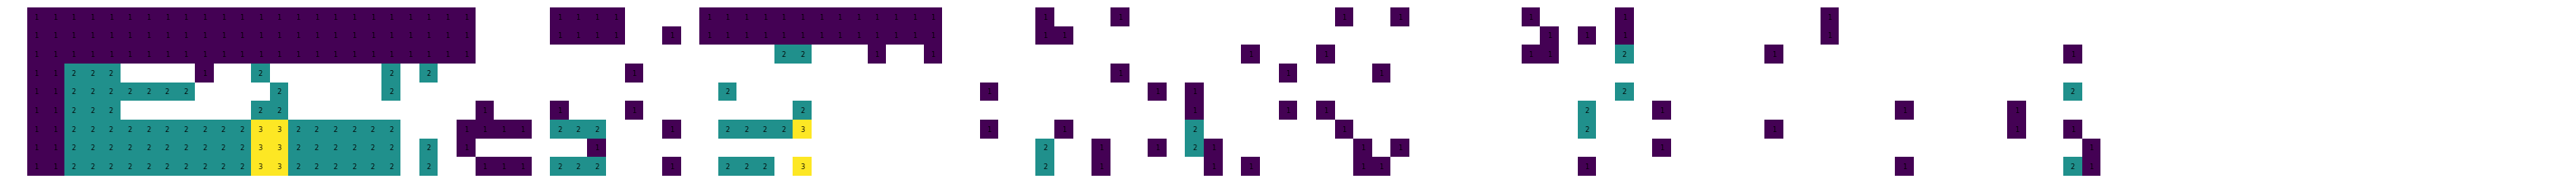

In [20]:
eyes_shared_unique = calc_shared_unique(eye_msgs_tri)
plot_im(eyes_shared_unique, True)

### Random Data

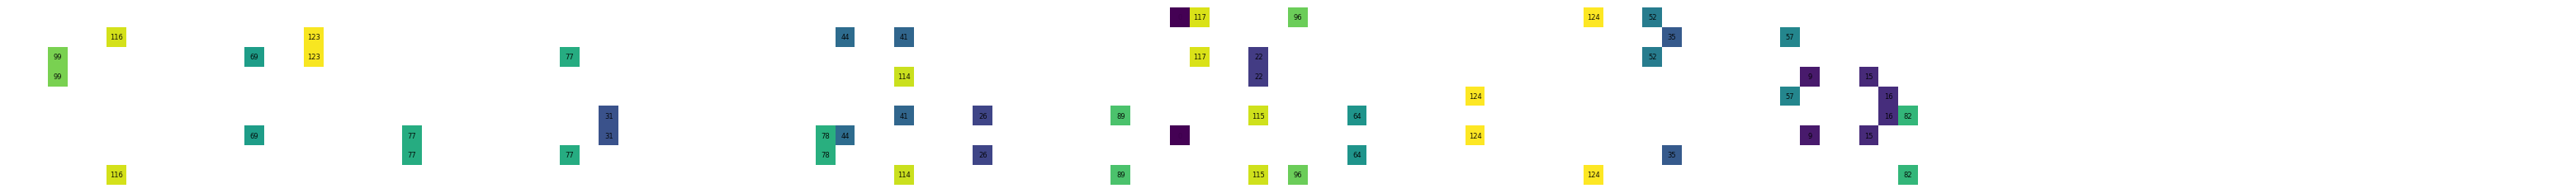

In [21]:
msgs_random, _ = generate_random_msgs_tri()
random_shared = calc_shared(msgs_random)
plot_im(random_shared, True)

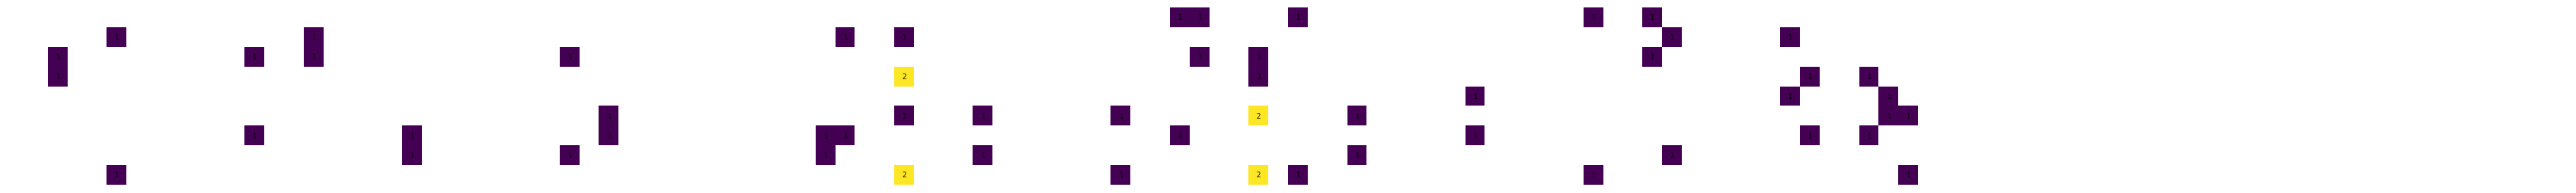

In [22]:
random_shared_unique = calc_shared_unique(msgs_random)
plot_im(random_shared_unique, True)

## 3.3. Reading Order (83)

`eye_msgs_tri` read as triplets of individual eyes.  
Data in `eye_msgs_triflat` by default is in 123123 format.  
6x6 grid represents each of the permutations of this reading order.  
<br />
**Observation:** Reading the eyes as trigrams with 123123 gives contiguous 0-82.  
**Key Takeaway:** No other reading order works the same amount.  

In [23]:
def plot_msgs_reading_orders(eye_msgs_triflat):
  perms = list(permutations([1, 2, 3]))
  fig, axs = plt.subplots(6, 6, figsize=(1, 1), dpi=850)

  counters = { }
  for x, p1 in enumerate(perms):
    for y, p2 in enumerate(perms):
      label = "".join([ str(a) for a in p1 + p2 ])

      counter = Counter()
      for message_raw in eye_msgs_triflat:
        parsed = [ conv_triflat_to_tri_ordered(v, p1) if i % 2 == 0 else conv_triflat_to_tri_ordered(v, p2) for i,v in enumerate(message_raw) ]
        counter.update(parsed)
      counters[label] = counter

      data_x = range(125)
      data_y = [counter[a] for a in data_x]
      axs[x, y].bar(data_x, data_y)
      axs[x, y].axis("off")
      axs[x, y].set_title(label, pad=-2, fontdict={ 'fontsize': 0.5 }, alpha=0.4, y=0.05)
  
  plt.show()
  return counters

def get_runs_from_labelled_freq(labelled_freq):
  for label in labelled_freq:
    runs = []
    current_run = None
    for i in range(0, 125):
    
      if labelled_freq[label][i] > 0:
        current_run = current_run or [i, i]
        current_run[1] = i

      elif current_run is not None:
        runs.append(current_run)
        current_run = None

    if current_run is not None:
        runs.append(current_run)

    print(f"Runs for {label}: {runs}")

### Eye Data

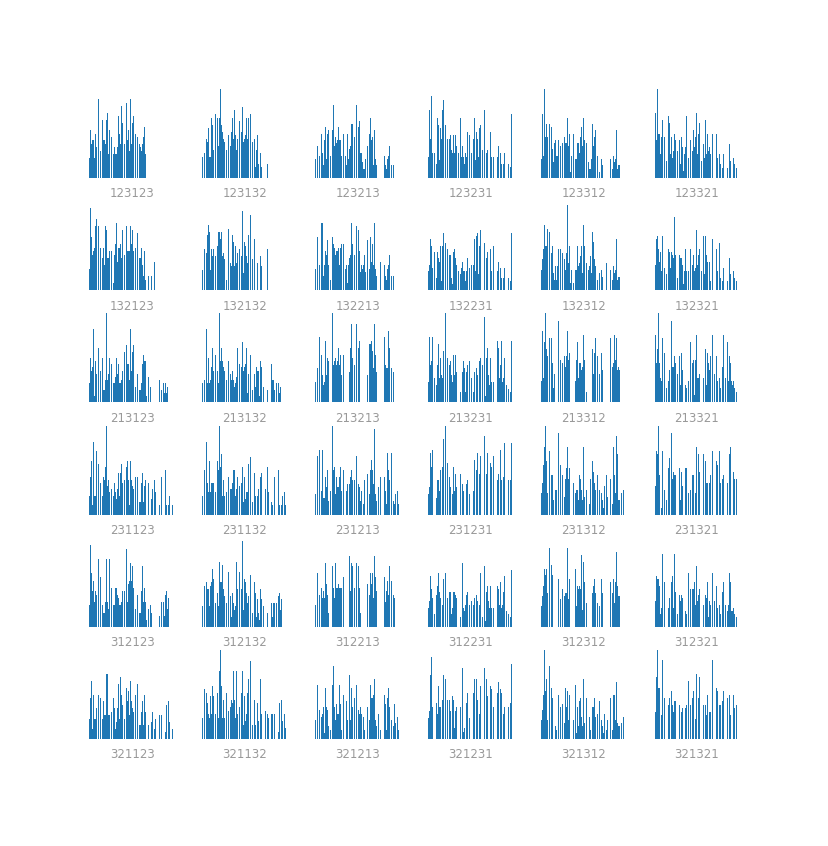

In [24]:
eye_msgs_tri_freq = plot_msgs_reading_orders(eye_msgs_triflat)

In [25]:
get_runs_from_labelled_freq(eye_msgs_tri_freq)

Runs for 123123: [[0, 82]]
Runs for 123132: [[0, 82], [85, 86], [90, 90], [95, 95]]
Runs for 123213: [[0, 89], [100, 114]]
Runs for 123231: [[0, 82], [85, 87], [90, 92], [95, 97], [100, 102], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 123312: [[0, 90], [100, 115]]
Runs for 123321: [[0, 82], [85, 87], [90, 92], [95, 97], [100, 103], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 132123: [[0, 82], [85, 86], [90, 90], [95, 95]]
Runs for 132132: [[0, 76], [80, 81], [85, 86], [90, 90], [95, 95]]
Runs for 132213: [[0, 90], [95, 95], [100, 114]]
Runs for 132231: [[0, 77], [80, 82], [85, 87], [90, 92], [95, 97], [100, 102], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 132312: [[0, 90], [95, 95], [100, 115]]
Runs for 132321: [[0, 78], [80, 82], [85, 87], [90, 92], [95, 97], [100, 103], [105, 107], [110, 112], [115, 117], [120, 122]]
Runs for 213123: [[0, 89], [100, 114]]
Runs for 213132: [[0, 90], [95, 95], [100, 114]]
Runs for 213213: [[0, 19], [25, 42], [50

### Random Data

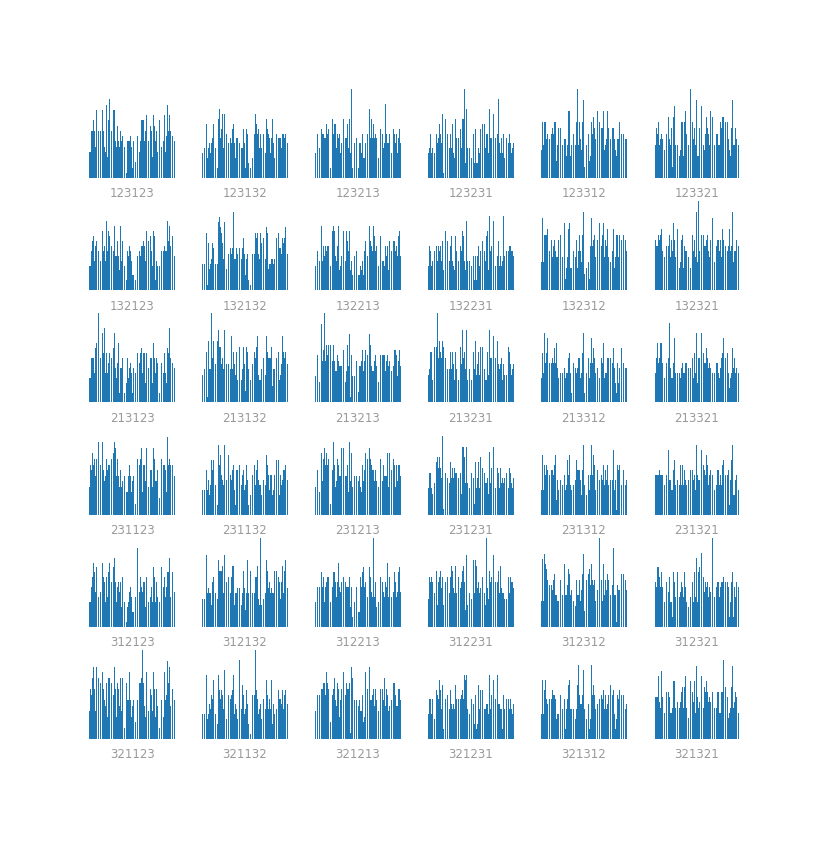

In [26]:
_, msgs_random_flat = generate_random_msgs_tri()
random_labelled_freq = plot_msgs_reading_orders(msgs_random_flat)

In [27]:
get_runs_from_labelled_freq(random_labelled_freq)

Runs for 123123: [[0, 124]]
Runs for 123132: [[0, 124]]
Runs for 123213: [[0, 124]]
Runs for 123231: [[0, 124]]
Runs for 123312: [[0, 124]]
Runs for 123321: [[0, 124]]
Runs for 132123: [[0, 124]]
Runs for 132132: [[0, 124]]
Runs for 132213: [[0, 124]]
Runs for 132231: [[0, 124]]
Runs for 132312: [[0, 124]]
Runs for 132321: [[0, 124]]
Runs for 213123: [[0, 124]]
Runs for 213132: [[0, 124]]
Runs for 213213: [[0, 124]]
Runs for 213231: [[0, 124]]
Runs for 213312: [[0, 124]]
Runs for 213321: [[0, 124]]
Runs for 231123: [[0, 124]]
Runs for 231132: [[0, 124]]
Runs for 231213: [[0, 124]]
Runs for 231231: [[0, 124]]
Runs for 231312: [[0, 124]]
Runs for 231321: [[0, 124]]
Runs for 312123: [[0, 124]]
Runs for 312132: [[0, 124]]
Runs for 312213: [[0, 124]]
Runs for 312231: [[0, 124]]
Runs for 312312: [[0, 124]]
Runs for 312321: [[0, 124]]
Runs for 321123: [[0, 124]]
Runs for 321132: [[0, 124]]
Runs for 321213: [[0, 124]]
Runs for 321231: [[0, 124]]
Runs for 321312: [[0, 124]]
Runs for 321321: [[0

## 3.4. Prime Lengths

Lengths of each of the eye_msgs_tri.  
<br />
**Key Takeaway:** Cannot split eye_msgs_tri into sections.  

In [28]:
#@title Code
def print_prime_info(eye_msgs_tri):
  print("Length of eye_msgs_tri:")
  print("-------------------")
  for i in range(len(eye_msgs_tri)):
    l = len(eye_msgs_tri[i])
    print(f"{i}: {l}, prime: {calc_if_prime(l)}")

### Eye Data

In [29]:
print_prime_info(eye_msgs_tri)

Length of eye_msgs_tri:
-------------------
0: 99, prime: False
1: 103, prime: True
2: 118, prime: False
3: 102, prime: False
4: 137, prime: True
5: 124, prime: False
6: 119, prime: False
7: 120, prime: False
8: 114, prime: False


### Random Data

In [30]:
msgs_random, _ = generate_random_msgs_tri()
print_prime_info(msgs_random)

Length of eye_msgs_tri:
-------------------
0: 128, prime: False
1: 97, prime: True
2: 129, prime: False
3: 120, prime: False
4: 127, prime: True
5: 111, prime: False
6: 123, prime: False
7: 135, prime: False
8: 102, prime: False


## 3.5. Gaps and Isomorphs

Show the number of gaps of each length across each message.  
<br />
**Observation:** There are no consecutive letters.  
**Observation:** There are isomorphs visible from the gaps.  

### Eye Data

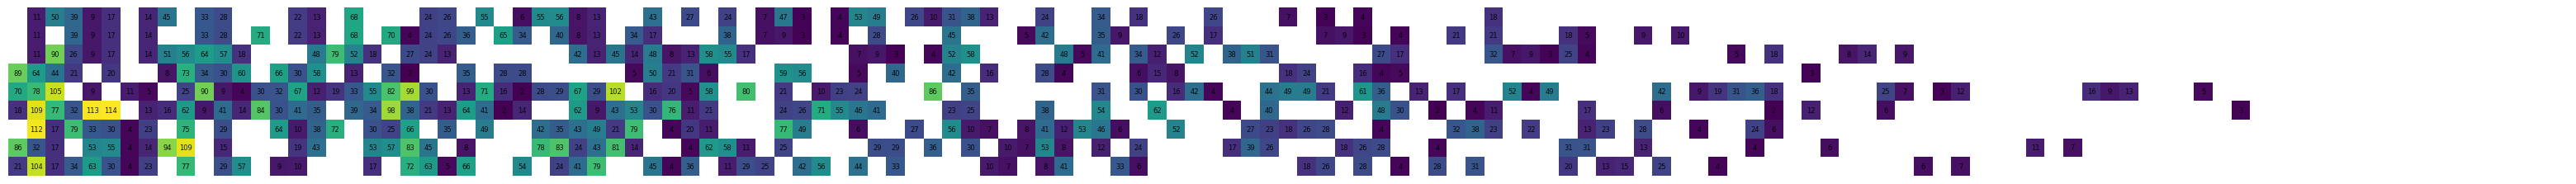

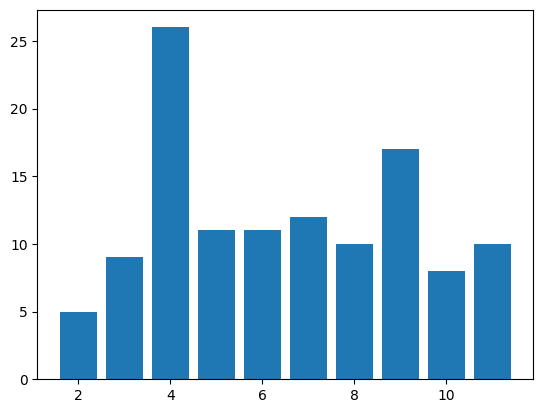

In [2]:
gap_im = calc_gaps(eye_msgs_tri)
plot_im(gap_im, True)

unique, counts = np.unique(gap_im, return_counts=True)
plt.bar(unique[:10], counts[:10])
plt.show()

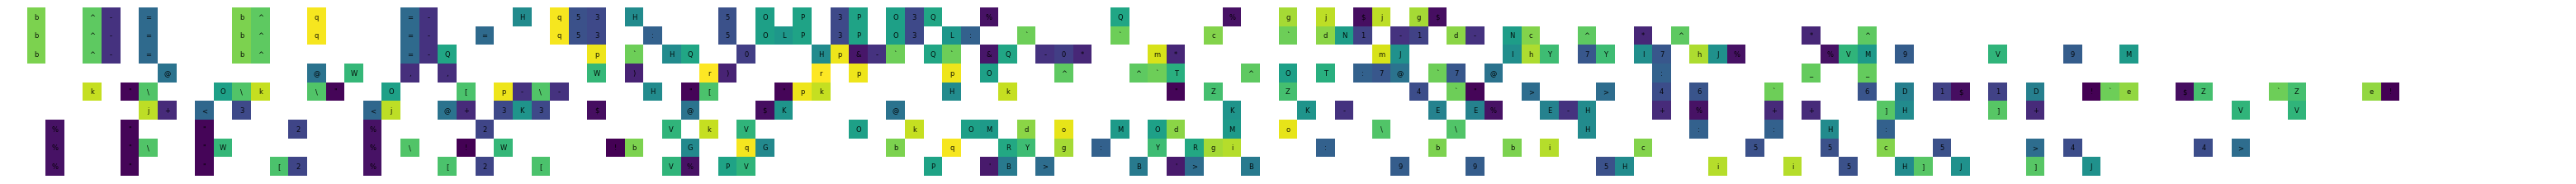

In [3]:
small_gap_im = calc_gaps(eye_msgs_tri, 16, True, False)
plot_im(small_gap_im, True, True)

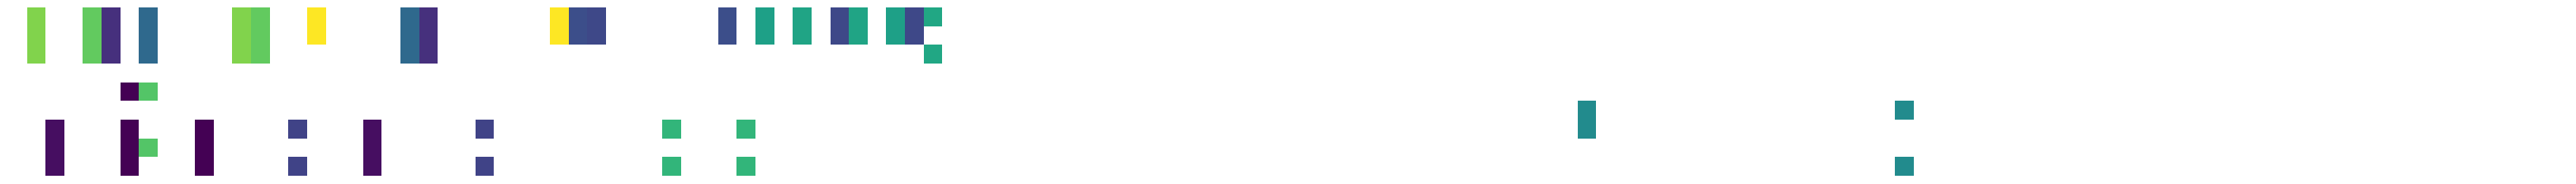

In [4]:
small_gap_im_shared = calc_shared(small_gap_im)
plot_im(small_gap_im_shared)

### Random Data

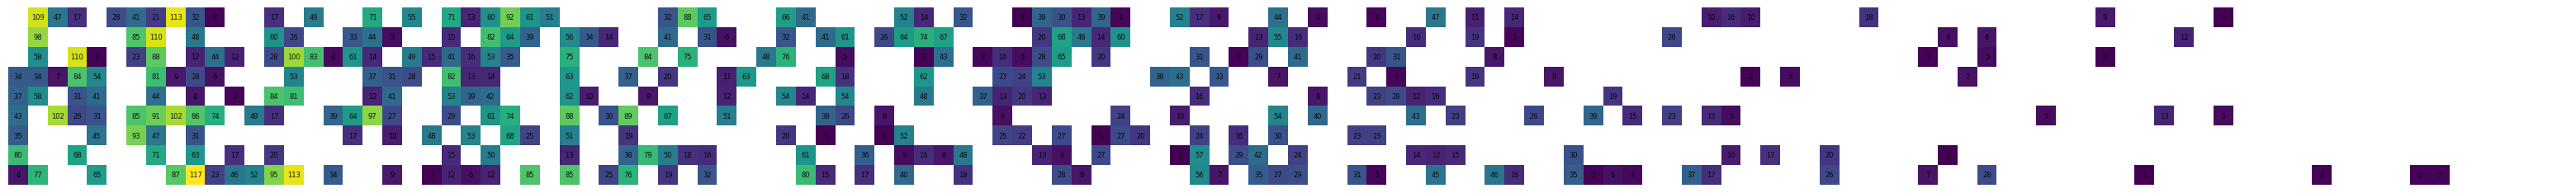

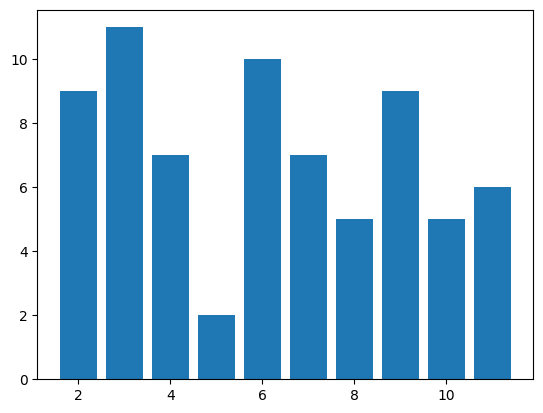

In [5]:
msgs_random, _ = generate_random_msgs_tri()
random_gap_im = calc_gaps(msgs_random)
plot_im(random_gap_im, True)

random_unique, counts = np.unique(random_gap_im, return_counts=True)
plt.bar(unique[:10], counts[:10])
plt.show()

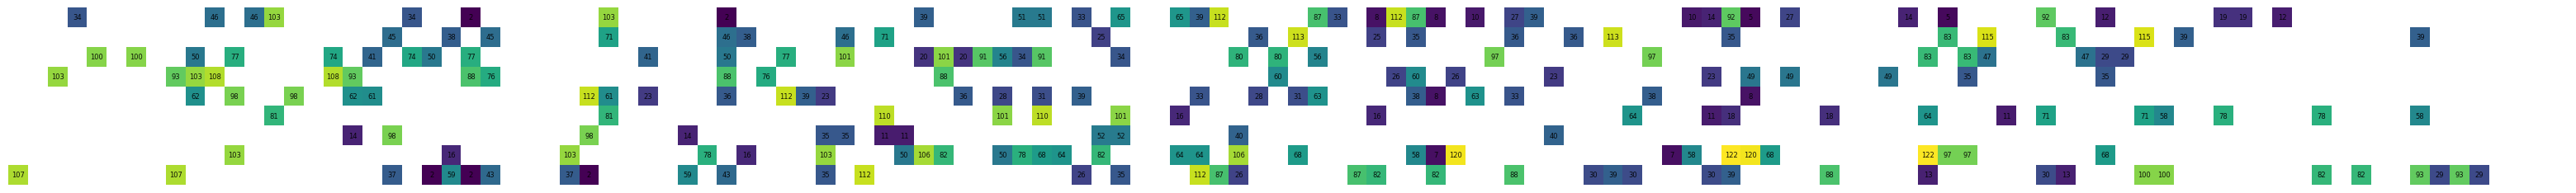

In [7]:
random_small_gap_im = calc_gaps(msgs_random, 16, True, False)
plot_im(random_small_gap_im, True)

# Other
---

Messages plain (CIPHERTEXT_NUM)


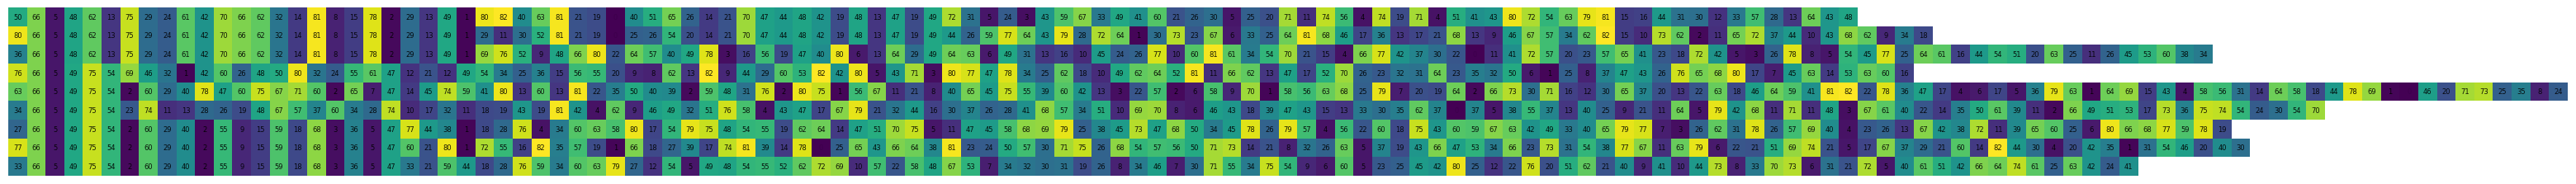

Messages plain (CIPHERTEXT_ASCII)


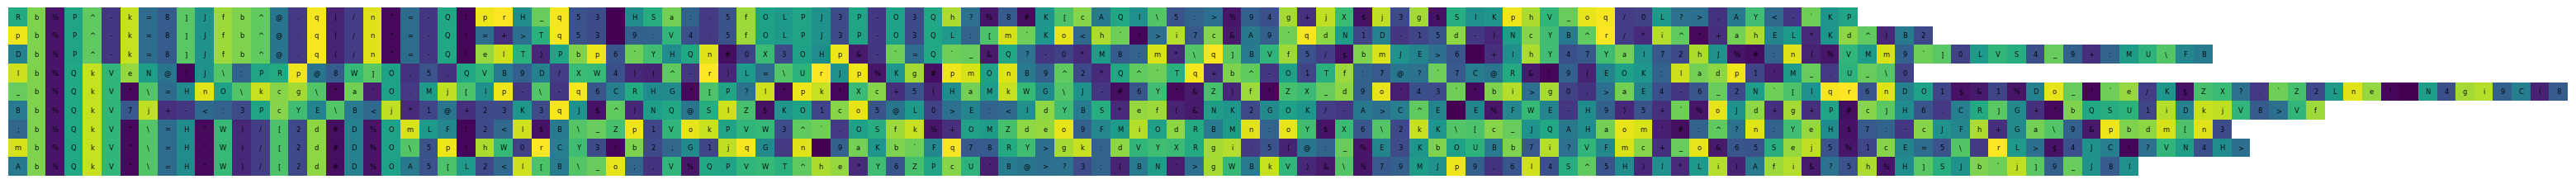


Messages shared sections (CIPHERTEXT_NUM)


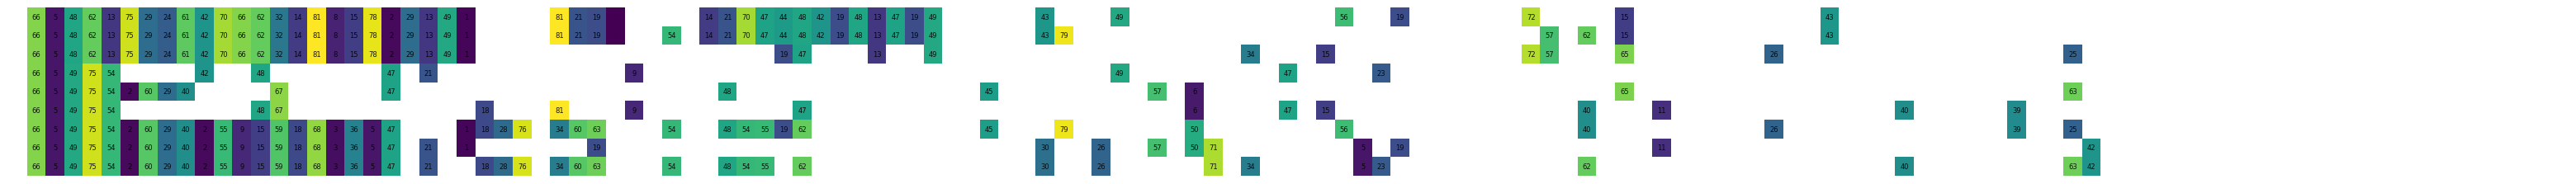


Gaps (Start + end) (GAP_SIZE)


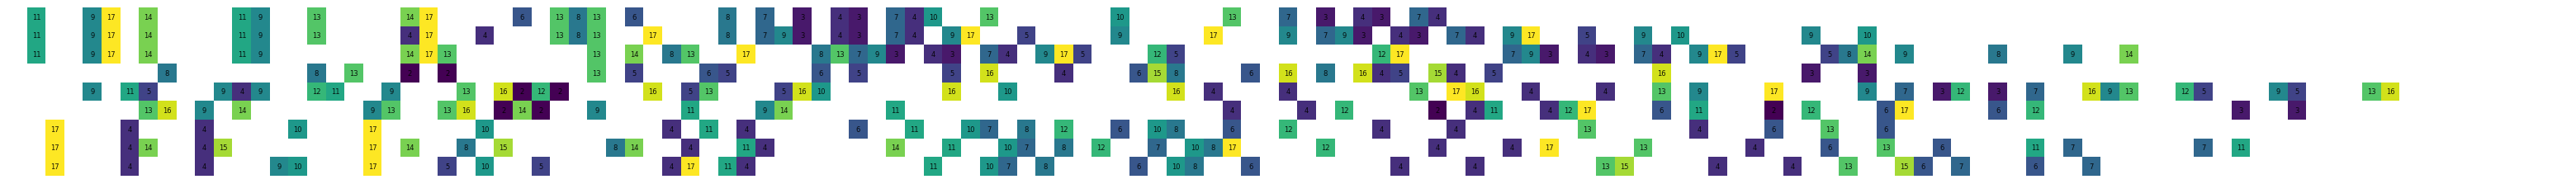


Gaps (Only start) (GAP_SIZE)


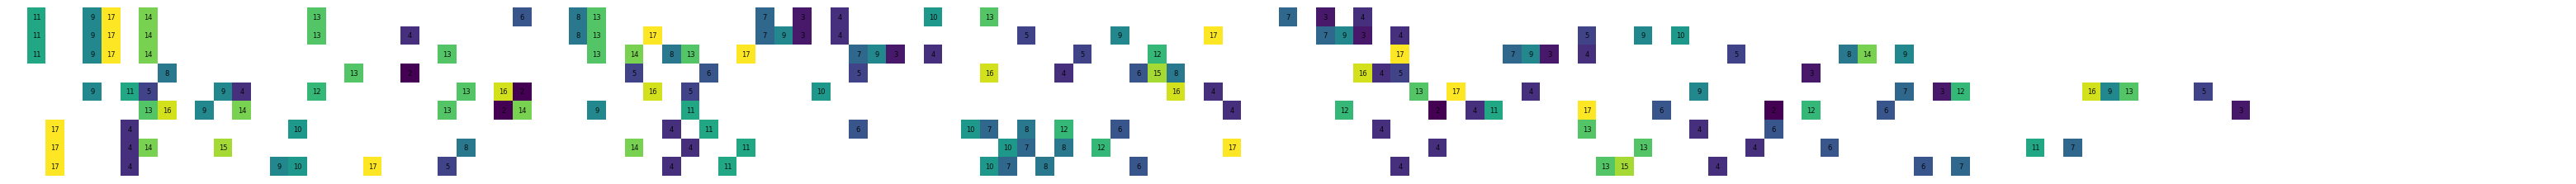


Repeats (REPEAT_COUNT)


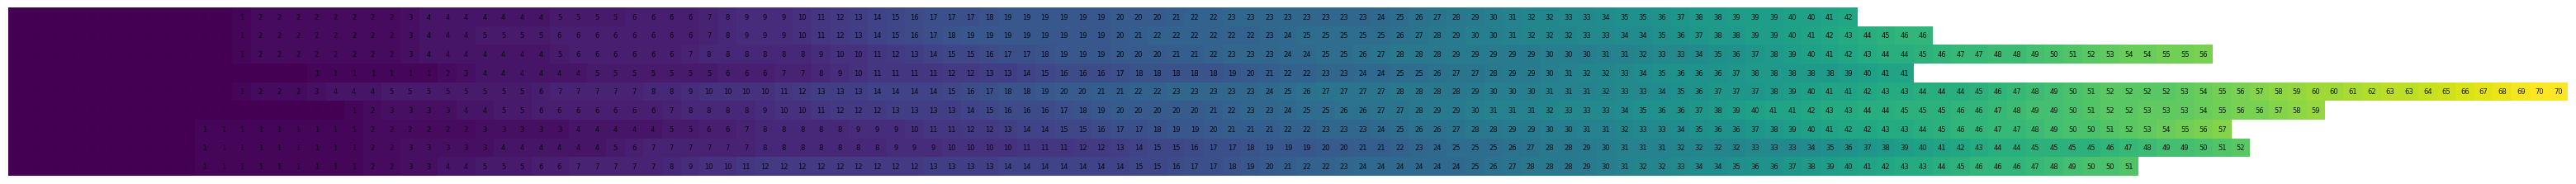

In [38]:

print("eye_msgs_tri plain (CIPHERTEXT_NUM)")
show_plain(eye_msgs_tri, False)

print("eye_msgs_tri plain (CIPHERTEXT_ASCII)")
show_plain(eye_msgs_tri, True)

print("\neye_msgs_tri shared sections (CIPHERTEXT_NUM)")
show_shared(eye_msgs_tri)

print("\nGaps (Start + end) (GAP_SIZE)")
small_gap_im_gap = calc_gaps(eye_msgs_tri, 16, True, True)
imshow_clean(small_gap_im_gap, True, False)

print("\nGaps (Only start) (GAP_SIZE)")
small_gap_im_gap_starts = calc_gaps(eye_msgs_tri, 16, False, True)
imshow_clean(small_gap_im_gap_starts, True, False)

print("\nRepeats (REPEAT_COUNT)")
im_repeats = calc_repeats(eye_msgs_tri)
imshow_clean(im_repeats, True, False)

# New Cipher
---

In [138]:
class Cipher:
    pt_alphabet: list
    ct_alphabet: list
    _pt: list

    def __init__(self, pt_alphabet: list, ct_alphabet: list):
        self.pt_alphabet = pt_alphabet
        self.ct_alphabet = ct_alphabet

    def p(self, i):
        return self._pt[i]
    
    def factor(self, i):
        return 2

    def c(self, i):
        return (self.p(i) * self.factor(i)) % len(self.ct_alphabet)

    def prepare_pt(self, m):
        cm = m.replace(" ", "").replace(".", "").lower()
        return [ self.pt_alphabet.index(l) for l in cm ]
    
    def encode(self, pt: list):
        self._pt = pt
        return [ self.c(i) for i,l in enumerate(pt) ]


In [139]:
pt_alphabet = list(string.ascii_lowercase)
ct_alphabet = list(range(83))

print(f"Plaintext Alphabet ({len(pt_alphabet)}): {pt_alphabet}")
print(f"Ciphertext Alphabet ({len(ct_alphabet)}): {ct_alphabet}")

cipher = Cipher(pt_alphabet, ct_alphabet)

all_m = [
    "The sacrifice of oneself to the pursuit of knowledge Is the highest trizbute to the gods.",
    "The sacrifice of zoneself to the pursuit ozf knowledge Is the highest tribute zto the gods.",
    "The sacrifice of onezself to the pursuit of knowledge Is the hizghest tribute to the gods."  
]

all_pt = [ cipher.prepare_pt(m) for m in all_m ]
all_ct = [ cipher.encode(pt) for pt in all_pt ]

all_pt = fill_out(all_pt)
all_ct = fill_out(all_ct)

Plaintext Alphabet (26): ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Ciphertext Alphabet (83): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


Plaintext


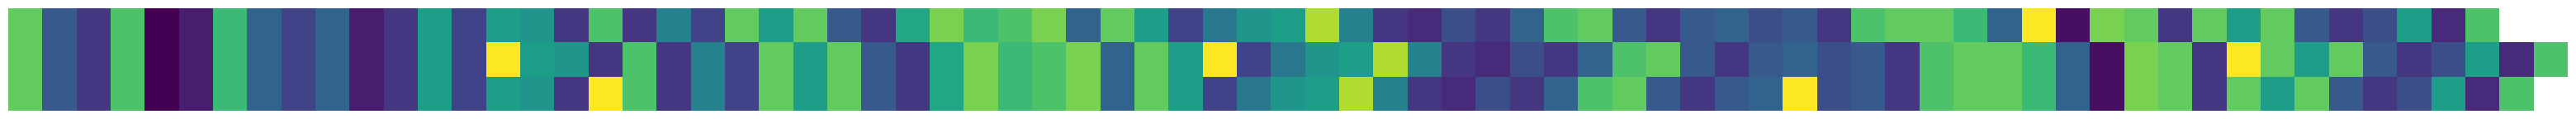

Ciphertext


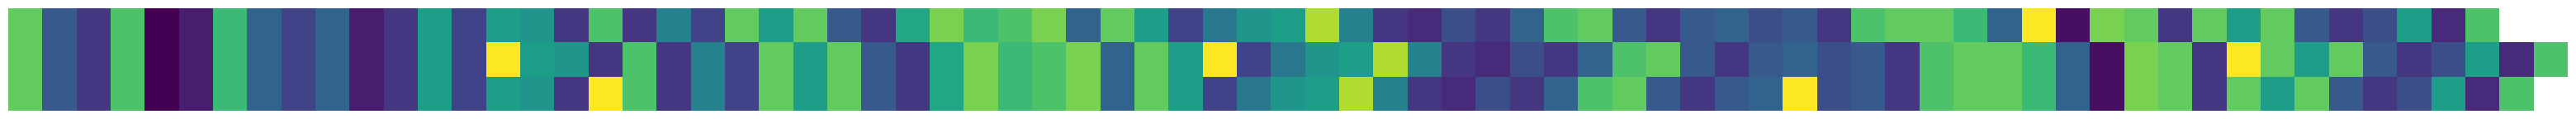

Ciphertext Shared


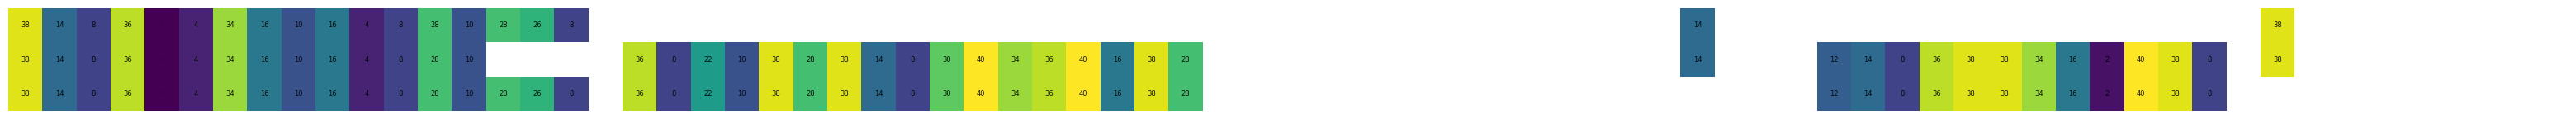

Small Gaps


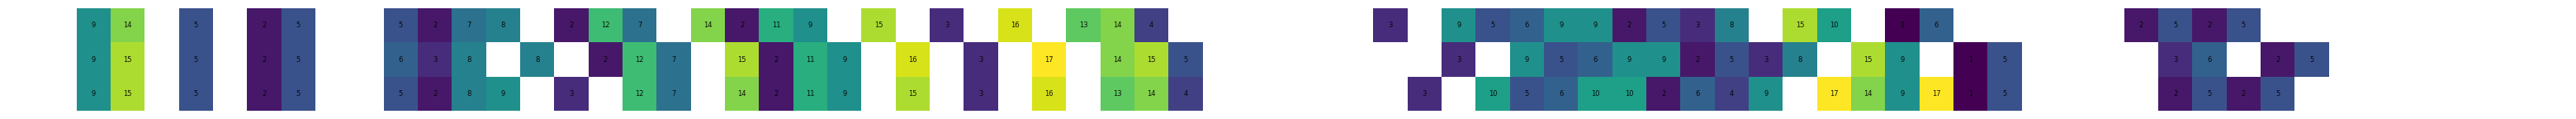

All Gaps


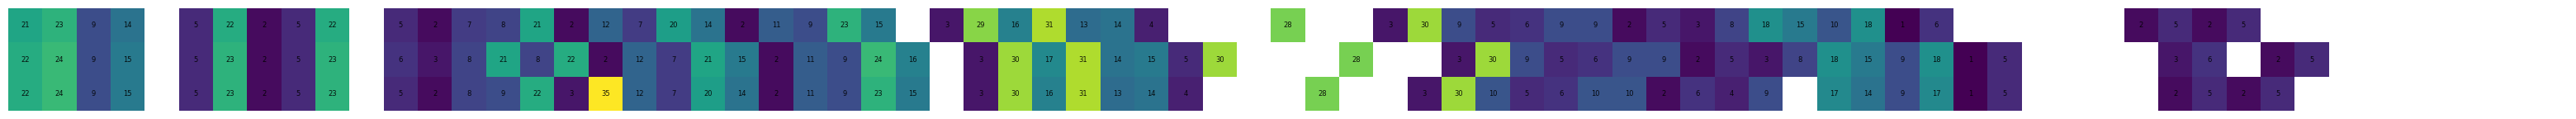

Gap Frequency


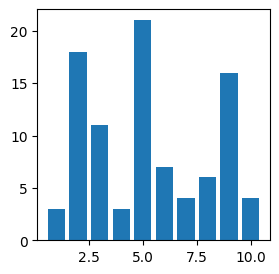

In [140]:
print("Plaintext")
imshow_clean(all_pt)

print("Ciphertext")
imshow_clean(all_ct)

print("Ciphertext Shared")
show_shared(all_ct)

print("Small Gaps")
small_gap_ct = calc_gaps(all_ct, 16, False, True)
imshow_clean(small_gap_ct, True)

print("All Gaps")
gap_ct = calc_gaps(all_ct, -1, False, True)
imshow_clean(gap_ct, True)

print("Gap Frequency")
show_gap_freq(gap_ct)